In [1]:
from sympy import * 
from sympy.abc import *
import numpy as np
import matplotlib.pyplot as plt
init_printing()

#### Example 4.11 pag 131

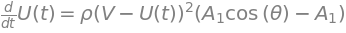

In [71]:
a1, a2, C1 = symbols("A_1 A_2 C1") 
U = Function("U")(t) # f is a function of x
du = Derivative(U, t)

e = Eq(du, rho*((V-U)**2)*(-a1 + a1*cos(theta)))
e

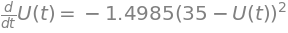

In [72]:
#e = Eq(du, rho*((V-U)**2)*(-a1 + a2*cos(theta)))
en = e.subs({rho:999, a1:0.003, theta:np.radians(60), V:35})
en

In [73]:
dsolve(en)

In [77]:
s = dsolve(e)
s.subs({rho:999, a1:0.003, theta:np.radians(60), V:35, C1:0}).simplify()

C:\Users\arthu\anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
C:\Users\arthu\anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
C:\Users\arthu\anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
C:\Users\arthu\anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The MathtextBa

#### Relatório de Lab de mec flu I: Tubo de pitot - 14/01/2022

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ZebraLib as zb

data = np.array([[2000, 13], 
                [2200, 23], 
                [2400, 31], 
                [2600, 41], 
                [2800, 54], 
                [3000, 67]])

df = pd.DataFrame(data, columns=['RPM', 'L'])

df

,RPM,L
0,2000,13
1,2200,23
2,2400,31
3,2600,41
4,2800,54
5,3000,67


In [41]:
def dif_P(del_h):
    return 1E3*9.81*del_h

def Veloc(P):
    return ((2*P)/(1.184))**(1/2)

df['Lsen(theta)'] = df['L']*np.sin(np.radians(10))*1E-3
df['Del P'] = dif_P(df['Lsen(theta)'] )
df['V'] = Veloc(df['Del P'])

df

,RPM,L,Del P,V,Lsen(theta)
0,2000,13,22.145352,6.116183,0.002257
1,2200,23,39.180238,8.135283,0.003994
2,2400,31,52.808147,9.444731,0.005383
3,2600,41,69.843034,10.861772,0.007120
4,2800,54,91.988386,12.465384,0.009377
5,3000,67,114.133738,13.885009,0.011634


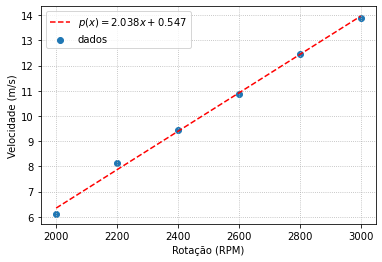

In [43]:
poly = zb.fit(df['RPM'], df['V'], 1)

fig, ax = plt.subplots()
ax.set(xlabel='Rotação (RPM)', ylabel='Velocidade (m/s)')

ax.scatter(df['RPM'], df['V'], label='dados')
ax.plot(df['RPM'], poly(df['RPM']), ls='--', c='red', label=r'$p(x)=2.038x + 0.547$')

ax.grid(linestyle='dotted')
ax.legend()
fig.savefig('D:/fig.pdf', bbox_inches='tight')

## Exercício 5.5 - p. 189 FoxMcDonalds

In [4]:
from sympy import * 
from sympy.abc import *
import numpy as np
import matplotlib.pyplot as plt
init_printing()

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [12]:
v1 = symbols('V_1')
u = v1*(1 + (x/L))
dudx = Derivative(u, x, evaluate=False)
u, dudx

In [20]:
a = u*dudx
a

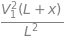

In [21]:
a.simplify()

In [22]:
solve(a)

In [37]:
x0 = symbols('x_0')
a = Eq(log(x - x0), A*tau)
a

In [38]:
solve(a, x)

In [34]:
e**(a).simplify()

In [49]:
g = integrate(1/x, (x, x0, x))
h = integrate(A, (t, 0, tau))
g

In [50]:
h

In [52]:
ss = Eq(g, h)
ss